In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read csv file
df = pd.read_csv('../data/Energy efficiency.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [16]:
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area',
'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
'X6': 'Orientation', 'X7': 'Glazing_Area',
'X8': 'Glazing_Area_Distribution',
'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}

df = df.rename(column_names, axis=1)

In [17]:
# quick overview the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [18]:
# check null columns
df.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

In [19]:
# describe the datasets
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


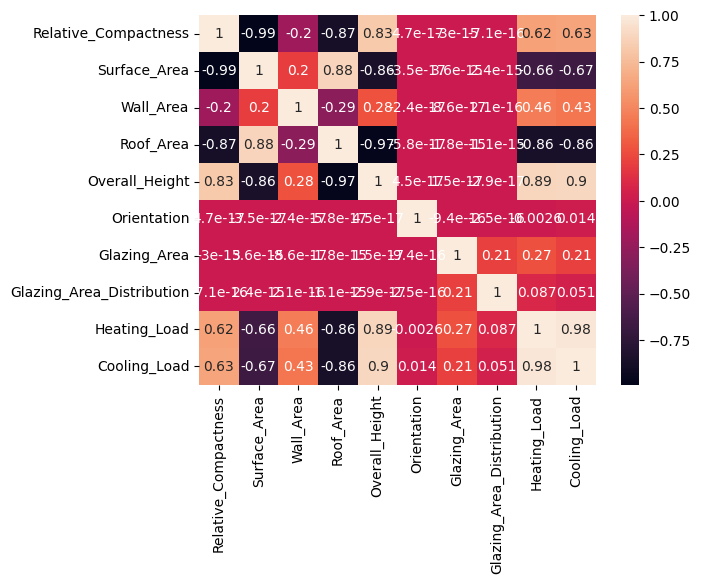

In [22]:
# check multicollinearity categorical features
corr = df.corr()
sns.heatmap(corr, annot=True);

#### Split the datasets

In [44]:
from sklearn.model_selection import train_test_split

features = df.columns.drop(["Heating_Load", "Cooling_Load"])
target = "Heating_Load"

# vertical split
X = df[features]
y = df[target]

# trian_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Normalize the datasets

In [61]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# normalize features
df_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)
X = df_normalized[features]
y = df_normalized[target]

# trian_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Build a Model

In [64]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler


model = make_pipeline(
    # MinMaxScaler(),
    LinearRegression()
).fit(X_train, y_train)
model

Pipeline(steps=[('linearregression', LinearRegression())])

#### Predict

In [65]:
predicted_values = model.predict(X_test)

#### MAE

In [66]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predicted_values)
mae

0.0597233948174281

#### RSS

In [67]:
import numpy as np

RSS = np.sum(np.square((y_test - predicted_values)))
RSS

1.035566028922542

#### R-Squared

In [60]:
from sklearn.metrics import r2_score

r2_score = r2_score(y_test, predicted_values)
r2_score

0.9126664326301311

#### Ridge Regression

In [71]:
from sklearn.linear_model import Ridge

ridge_model = make_pipeline(
    Ridge(alpha=0.5)
).fit(X_train, y_train)

#### Feature Selection and Lasso Regression

In [70]:
from sklearn.linear_model import Lasso

lasso_model = make_pipeline(
    Lasso(alpha=0.001)
).fit(X_train, y_train)

#### comparing the each coefficient

In [135]:
def get_coef_of_features(model, model_name):
    coefficients = model.named_steps[model_name].coef_.round(3)
    features_name = X_train.columns

    coef_df = pd.Series(coefficients, features_name).to_frame().set_axis([model_name], axis=1)
    coef_df.index.name = "Features"
    
    
    return coef_df

In [136]:
linear_coef = get_coef_of_features(model, "linearregression")
ridge_coef = get_coef_of_features(ridge_model, "ridge")
lasso_coef = get_coef_of_features(lasso_model, "lasso")

In [145]:
frames = [linear_coef, ridge_coef, lasso_coef]
pd.concat(frames, axis=1)

,linearregression,ridge,lasso
Features,,,
Relative_Compactness,-6.190000e-01,-0.294,-0.017
Surface_Area,2.521881e+13,-0.065,0.000
Wall_Area,-1.471097e+13,0.110,0.215
Roof_Area,-1.891410e+13,-0.172,-0.000
Overall_Height,3.900000e-01,0.437,0.456
Orientation,-4.000000e-03,-0.002,-0.000
Glazing_Area,2.200000e-01,0.216,0.211
Glazing_Area_Distribution,2.600000e-02,0.029,0.020
